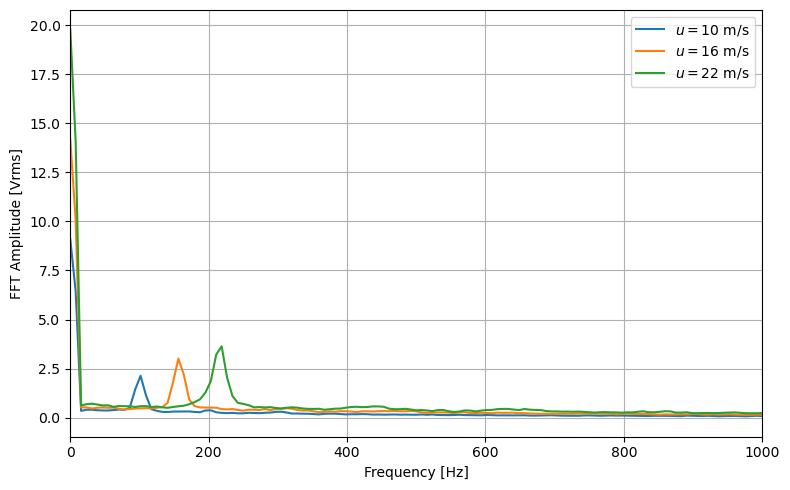

Peak frequencies (Hz):
$u = 10$ m/s: 101.56 Hz
$u = 16$ m/s: 156.25 Hz
$u = 22$ m/s: 218.75 Hz


In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# load FFT data 
fft_files = {
    "$u = 10$ m/s": "FFT_10.csv",
    "$u = 16$ m/s": "FFT_16.csv",
    "$u = 22$ m/s": "FFT_22.csv",
}

fft_data = {}

for label, fname in fft_files.items():
    df = pd.read_csv(fname, skiprows=17)  # data starts at row 18
    df.columns = ["Frequency (Hz)", "FFT Amplitude (Vrms)"]
    fft_data[label] = df

# plot FFT amplitude spectra (0–1000 Hz) 
plt.figure(figsize=(8, 5))
for label, df in fft_data.items():
    plt.plot(df["Frequency (Hz)"], df["FFT Amplitude (Vrms)"], label=label)

plt.xlim(0, 1000)
plt.xlabel("Frequency [Hz]")
plt.ylabel("FFT Amplitude [Vrms]")
# plt.title("FFT Amplitude Spectra for All Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("FFT_Amplitude_Spectra.png", dpi=400)
plt.show()


# find dominant (non-zero) frequency for each case 
peak_freqs = {}
for label, df in fft_data.items():
    df_nonzero = df[df["Frequency (Hz)"] > 10]  # ignore the DC component
    peak_freqs[label] = df_nonzero.loc[df_nonzero["FFT Amplitude (Vrms)"].idxmax(), "Frequency (Hz)"]

print("Peak frequencies (Hz):")
for label, f in peak_freqs.items():
    print(f"{label}: {f:.2f} Hz")

